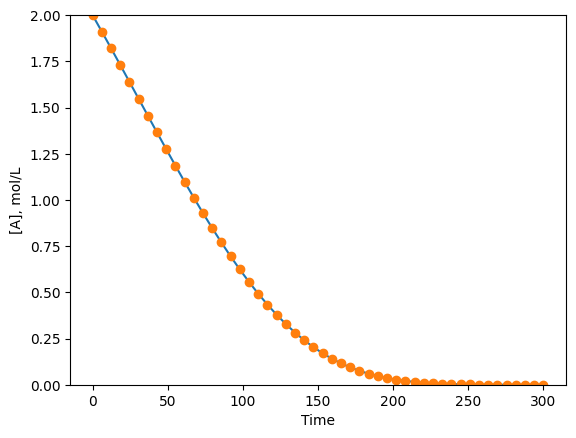

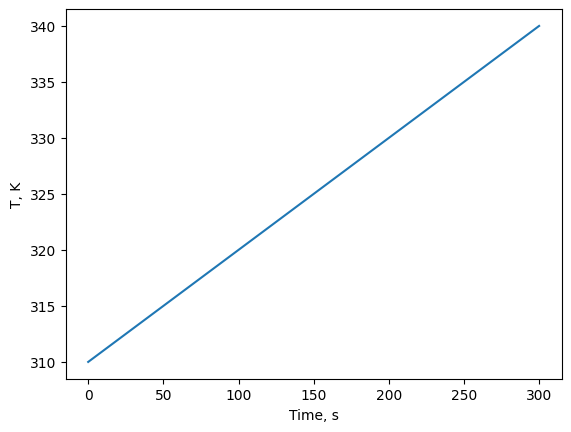

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# non-isothermal conditions (T = var)
# A -> B, k
# k = k0 exp(-Ea/RT)

# approach 1
def model1(y, t):
    A = y[0]
    B = y[1]
    T = y[2]
    k = k0*np.exp(-Ea/(R*T)) # calculate instant k at T
    dAdt = -k*A
    dBdt = k*A    
    dTdt = rT # <-- indirect temperature profile (dT/dt) = heating/cooling rate
    #print(t)
    return [dAdt, dBdt, dTdt]

# approach 2
def model2(y, t):
    A = y[0]
    B = y[1]
    T = rT*t+T0 # <-- direct temperature-time profile
    k = k0*np.exp(-Ea/(R*T)) # calculate instant k at T
    dAdt = -k*A
    dBdt = k*A
    #print(t)
    return [dAdt, dBdt]


# The model parameters
R = 8.314e-3 # kJ/mol*K
# Activation energy
Ea = 78 # kJ/mol
# Preexponential factor
k0 = 10**11.0 # L/mol*s
# Calculation time: 0 - 300s
t = np.linspace(0, 300)

# Initial conditions
A0 = 2 # mol/L
B0 = 0 # mol/L
T0 = 310 # K


# for approach no. 1
rT = 0.1

results = odeint(model1, [A0, B0, T0], t)
A1 = results[:,0]
B1 = results[:,1]
T1 = results[:,2]

results = odeint(model2, [A0, B0], t)
A2 = results[:,0]
B2 = results[:,1]


plt.ylim(0,2)
plt.xlabel('Time')
plt.ylabel('[A], mol/L')
plt.plot(t,A1)
plt.plot(t,A2, 'o')

plt.show()
plt.xlabel('Time, s')
plt.ylabel('T, K')
plt.plot(t,T1)
plt.show()

In [9]:
# symbolic calulations in Python:
# SymPy
# https://docs.sympy.org/latest/tutorials/intro-tutorial/features.html

import sympy as s
x, y, z = s.symbols("x y z")
s.diff(2*x+11, x)

2

In [11]:
s.integrate(11, x)

11*x

In [17]:
# T = 5*t**2+100 [oC]
# A+B=>C
# The model parameters
R = 8.314e-3 # kJ/mol*K
# Activation energy
Ea = 78 # kJ/mol
# Preexponential factor
k0 = 10**11.0 # L/mol*s
#t = 0--3
# A0=0.5 mol/L
# B0=0.5 mol/L


In [18]:
# ----------------------- BIO


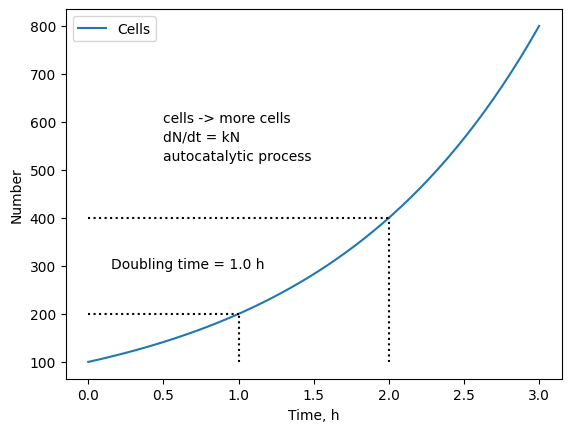

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Exponential growth
def model(y, t):
  N = y[0]
  dNdt = k*N
  return [dNdt]

k = 0.6931 #ln(2)
N0 = 100
t = np.linspace(0, 3)
results = odeint( model, [N0], t)
N = results[:,0]
# doubling time
t2 = np.log(2)/k
str = 'Doubling time = {:.1f} h'.format(t2)
plt.plot(t,N, label='Cells')
plt.xlabel('Time, h')
plt.ylabel('Number')
plt.legend(loc='best')
plt.text(0.5,600,'cells -> more cells')
plt.text(0.5,560,'dN/dt = kN')
plt.text(0.5,520,'autocatalytic process')
plt.text(0.15,295, str)
plt.plot((0,1*t2),(2*N0,2*N0),'k:')
plt.plot((1*t2,1*t2),(N0,2*N0),'k:')
plt.plot((0,2*t2),(4*N0,4*N0),'k:')
plt.plot((2*t2,2*t2),(N0,4*N0),'k:')

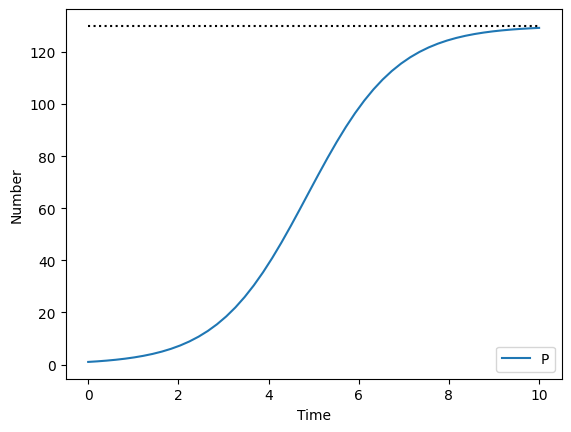

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Logistic model
def model(y, t):
    P = y[0]
    dPdt = r*P * (1-P/C)
    return [dPdt]

# growth rate
r = 1
# carrying capacity
C = 130
# initial population
P0 = 1
# simulation time
t_min = 0
t_max = 10

t = np.linspace(t_min, t_max)
results = odeint( model, [P0], t)
P = results[:,0]
plt.plot(t,P, label='P')
plt.xlabel('Time')
plt.ylabel('Number')
plt.legend(loc='best')
plt.plot((0,10),(C,C), 'k:')

In [22]:
# Try varying model parameters (𝑟 and 𝐶) to see what happens.
# Modify the script to plot rate of population growth versus time.

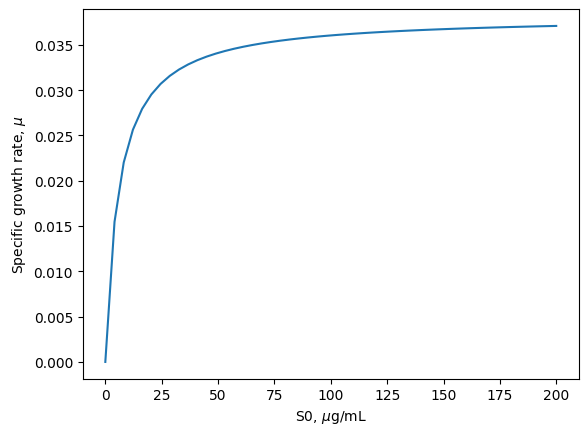

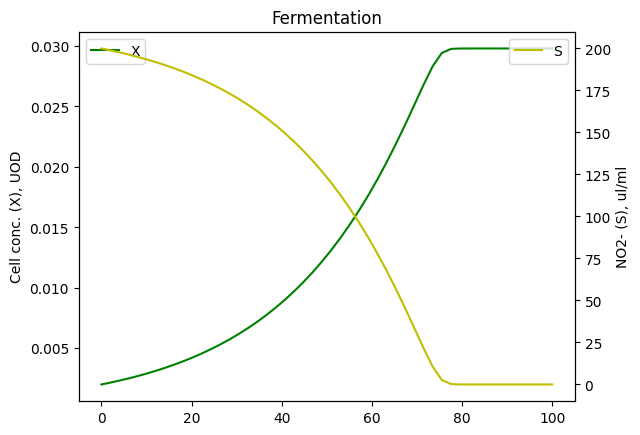

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Monod growth
def model(y, t):
    X = y[0]
    S = y[1]
    mi = mi_max*S/(KM+S)     # the specific growth rate
    dXdt = X * mi            # biomass growth (e.g. nitrobacter cells)
    dSdt = -1/Y * X * mi     # limiting substrate uptake
    return [dXdt, dSdt]

mi_max = 0.0382 # the maximum specific growth rate of the cells
KM = 6 # the saturation constant
Y = 0.139e-3 # The yield coefficients

# Initial conditions
X0 = 0.002  # O.D.
S0 = 200    # nitrite ug/ml 

# specific growth rate
S = np.linspace(0,200) # substrate concentration
mi = mi_max*S/(KM+S)   # the rate
plt.plot(S, mi)
plt.xlabel('S0, $\mu$g/mL')
plt.ylabel('Specific growth rate, $\mu$')
plt.show()

# Fermentation simulation
t = np.linspace(0, 100)
results = odeint( model, [X0, S0], t)
X = results[:,0]
S = results[:,1]
ax1 = plt.subplot(111)
ax1.plot(t,X, 'g', label='X')
ax1.set_ylabel('Cell conc. (X), UOD')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(t,S, 'y', label='S')
ax2.set_ylabel('NO2- (S), ul/ml')
ax2.set_xlabel('Time, h')
ax2.legend(loc='upper right')
ax1.set_title('Fermentation');
